# Sea Ice Concentration

Data Source: Climate Reanalyzer | Climate Change Institute, University of Maine

https://climatereanalyzer.org/reanalysis/monthly_tseries/

# Import Libraries

In [1]:
import pandas as pd
from prophet import Prophet
import pymannkendall as mk
import matplotlib.pyplot as plt
from collections import OrderedDict

# Hide Stanpy logs
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [2]:
def read_data(url):
    df = pd.read_csv(url, skiprows=8)
    df.index = df['Year']
    df = df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
    df = df.melt(ignore_index=False)
    df.columns = ['month', 'value']
    df.index = pd.to_datetime(df.index.astype(str) + "-" + df['month'] + "-01")
    df['y'] = df['value']
    del df['month']
    del df['value']
    df['y'] = df['y'].replace(-999, None)
    return df

In [3]:
def fit_model(df):
    df = df.copy()
    df['ds'] = df.index
    model = Prophet(interval_width=0.999, mcmc_samples=300, yearly_seasonality=False, weekly_seasonality=False)
    model.add_seasonality(name='yearly', period=365.25, fourier_order=5)
    model.fit(df, show_progress=False)
    future = model.make_future_dataframe(periods=0)
    forecast = model.predict(future)
    forecast.index = forecast['ds'].dt.to_pydatetime()
    return model, forecast

# Antarctic Sea Ice Concentration

## Data Sources

These URLs are generated from [here](https://climatereanalyzer.org/reanalysis/monthly_tseries/). They include every available reanalysis of sea ice concentration for Antarctica.

In [4]:
urls = OrderedDict(
    {
        'NOAA OISST V2.1':'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/oisst2.1/oisst2.1_antarctic_seaice_surface_0_0_table.csv',
        'NCEP/NCAR Reanalysis V1': 'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/ncep1/ncep1_antarctic_seaice_surface_0_0_table.csv',
        'NCEP CFSR/CFSV2': 'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/cfsr/cfsr_antarctic_seaice_surface_0_0_table.csv',
        'JMA JRA-55': 'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/jra55/jra55_antarctic_seaice_surface_0_0_table.csv',
        'ECMWF ERA-Interim': 'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/erai/erai_antarctic_seaice_surface_0_0_table.csv',
        'ECMWF ERA5': 'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/era5-0p5deg/era5-0p5deg_antarctic_seaice_surface_0_0_table.csv'
    }
)

## Time Series Trend Analysis

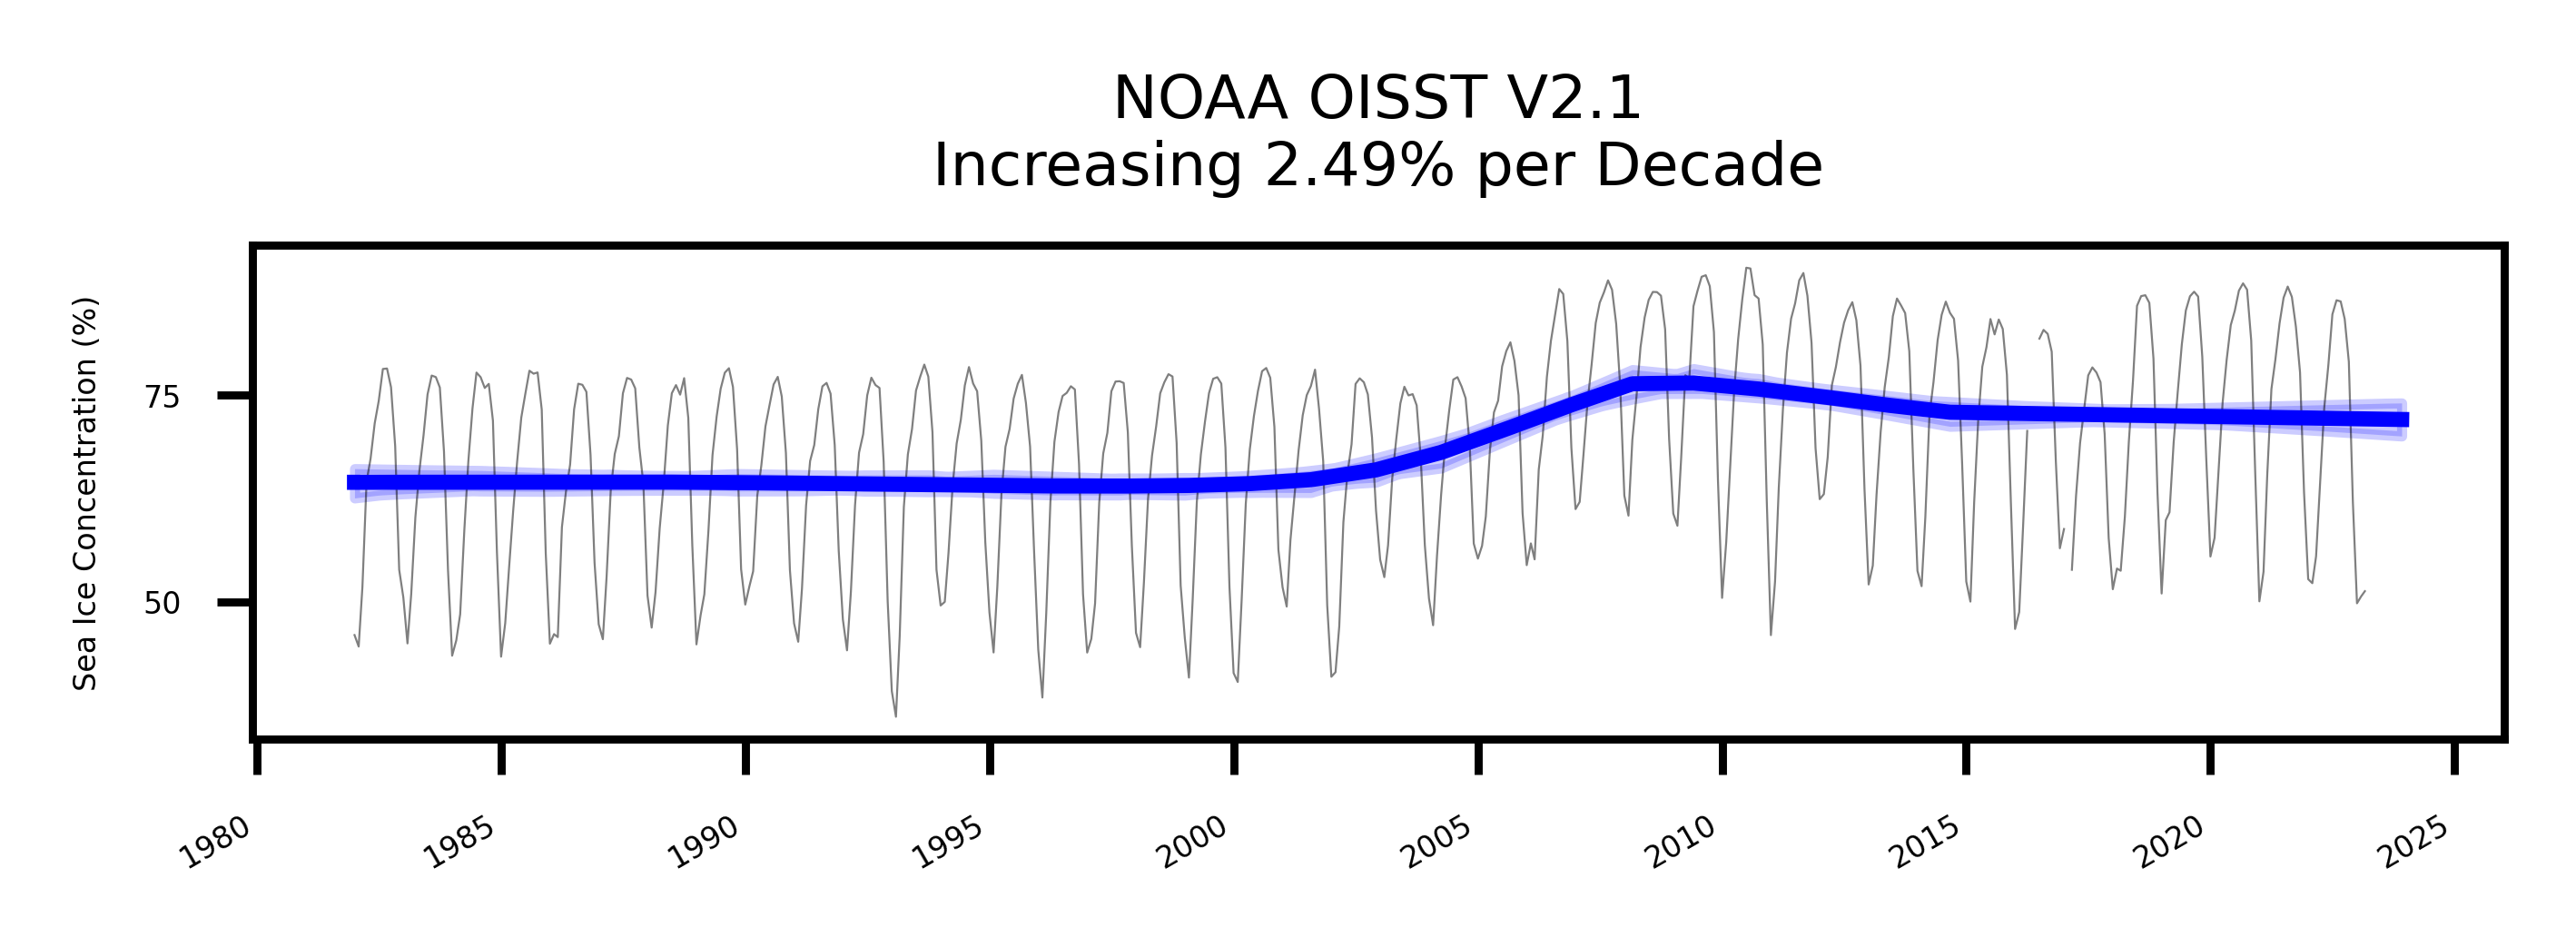

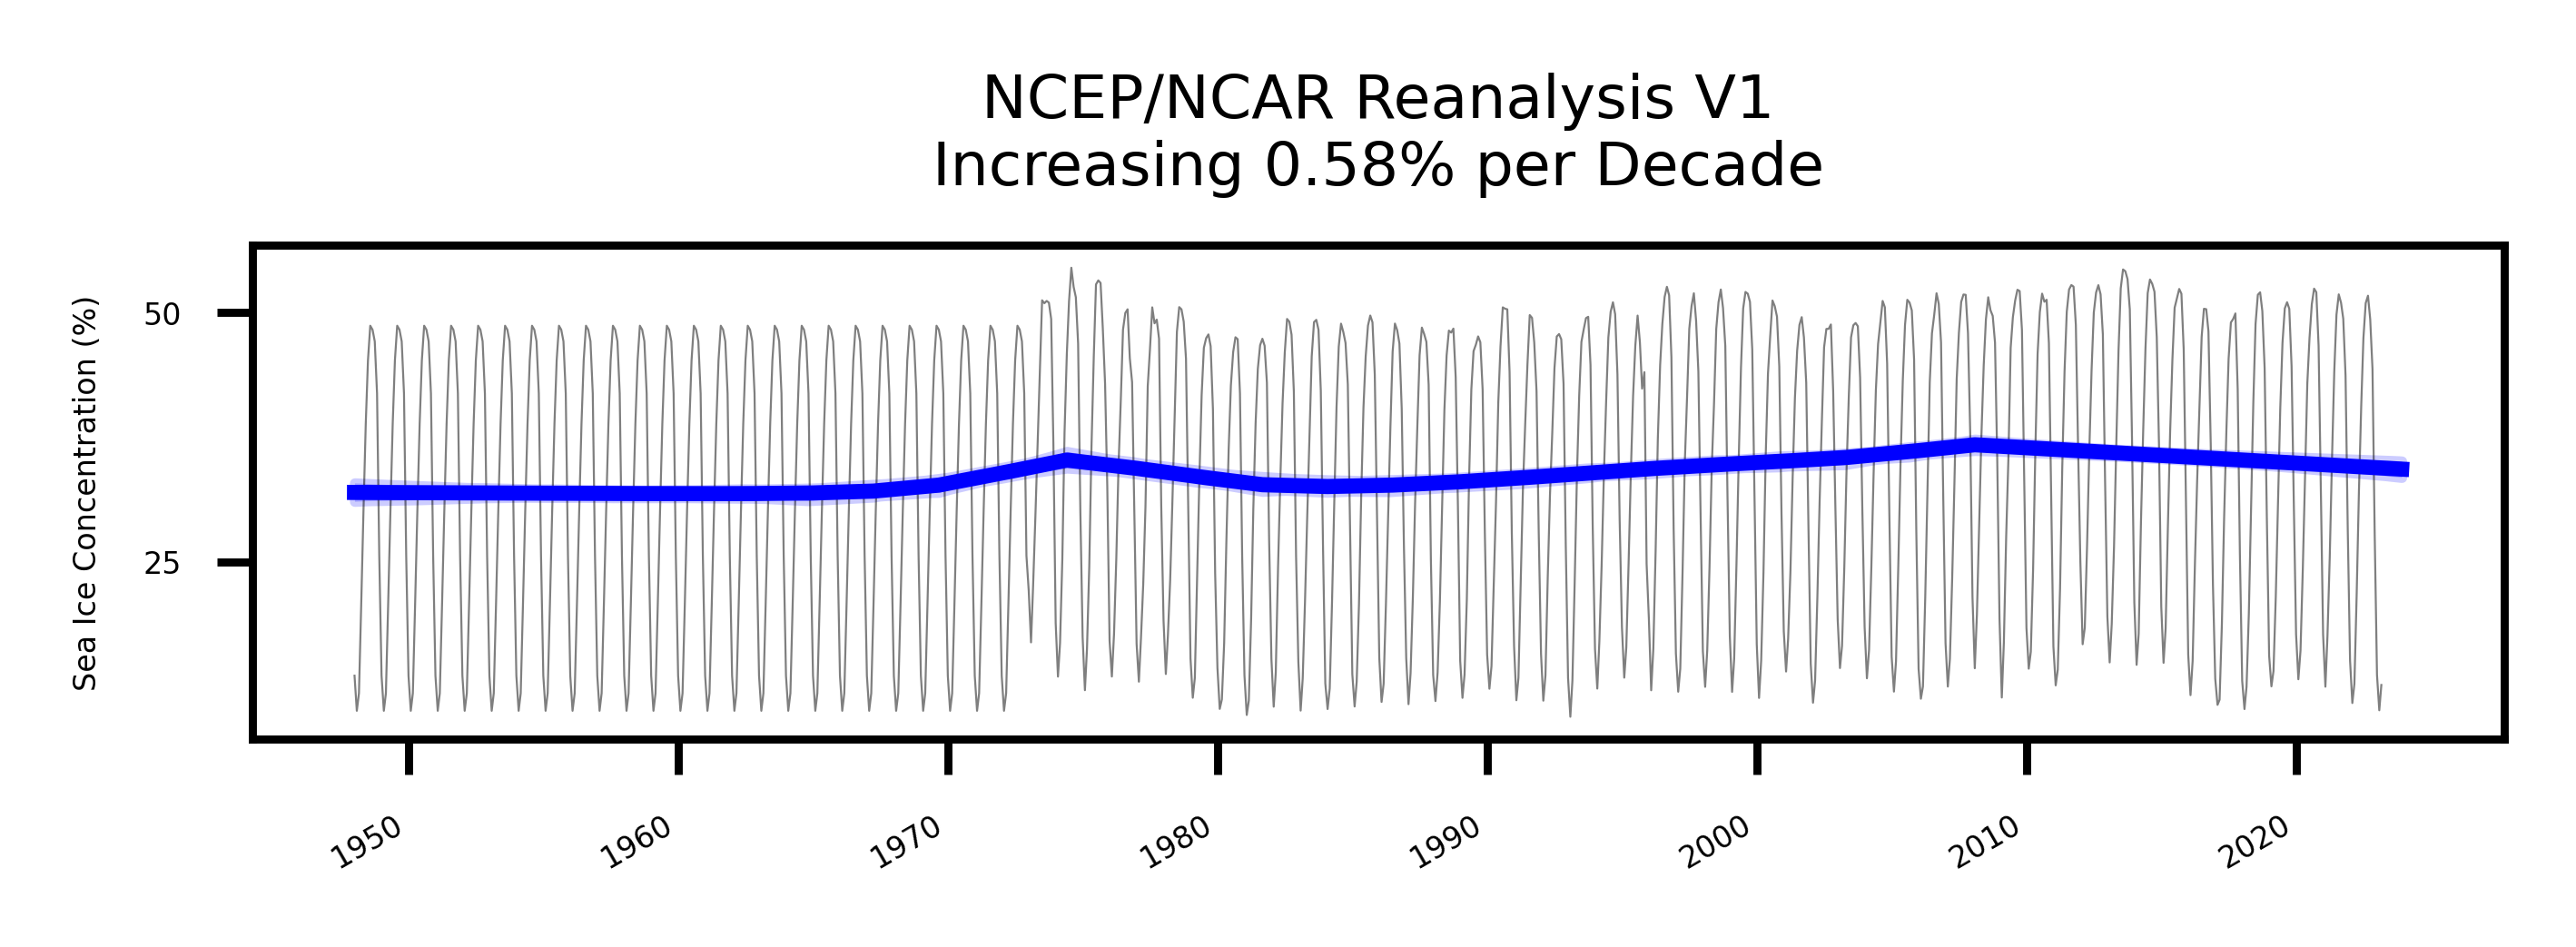

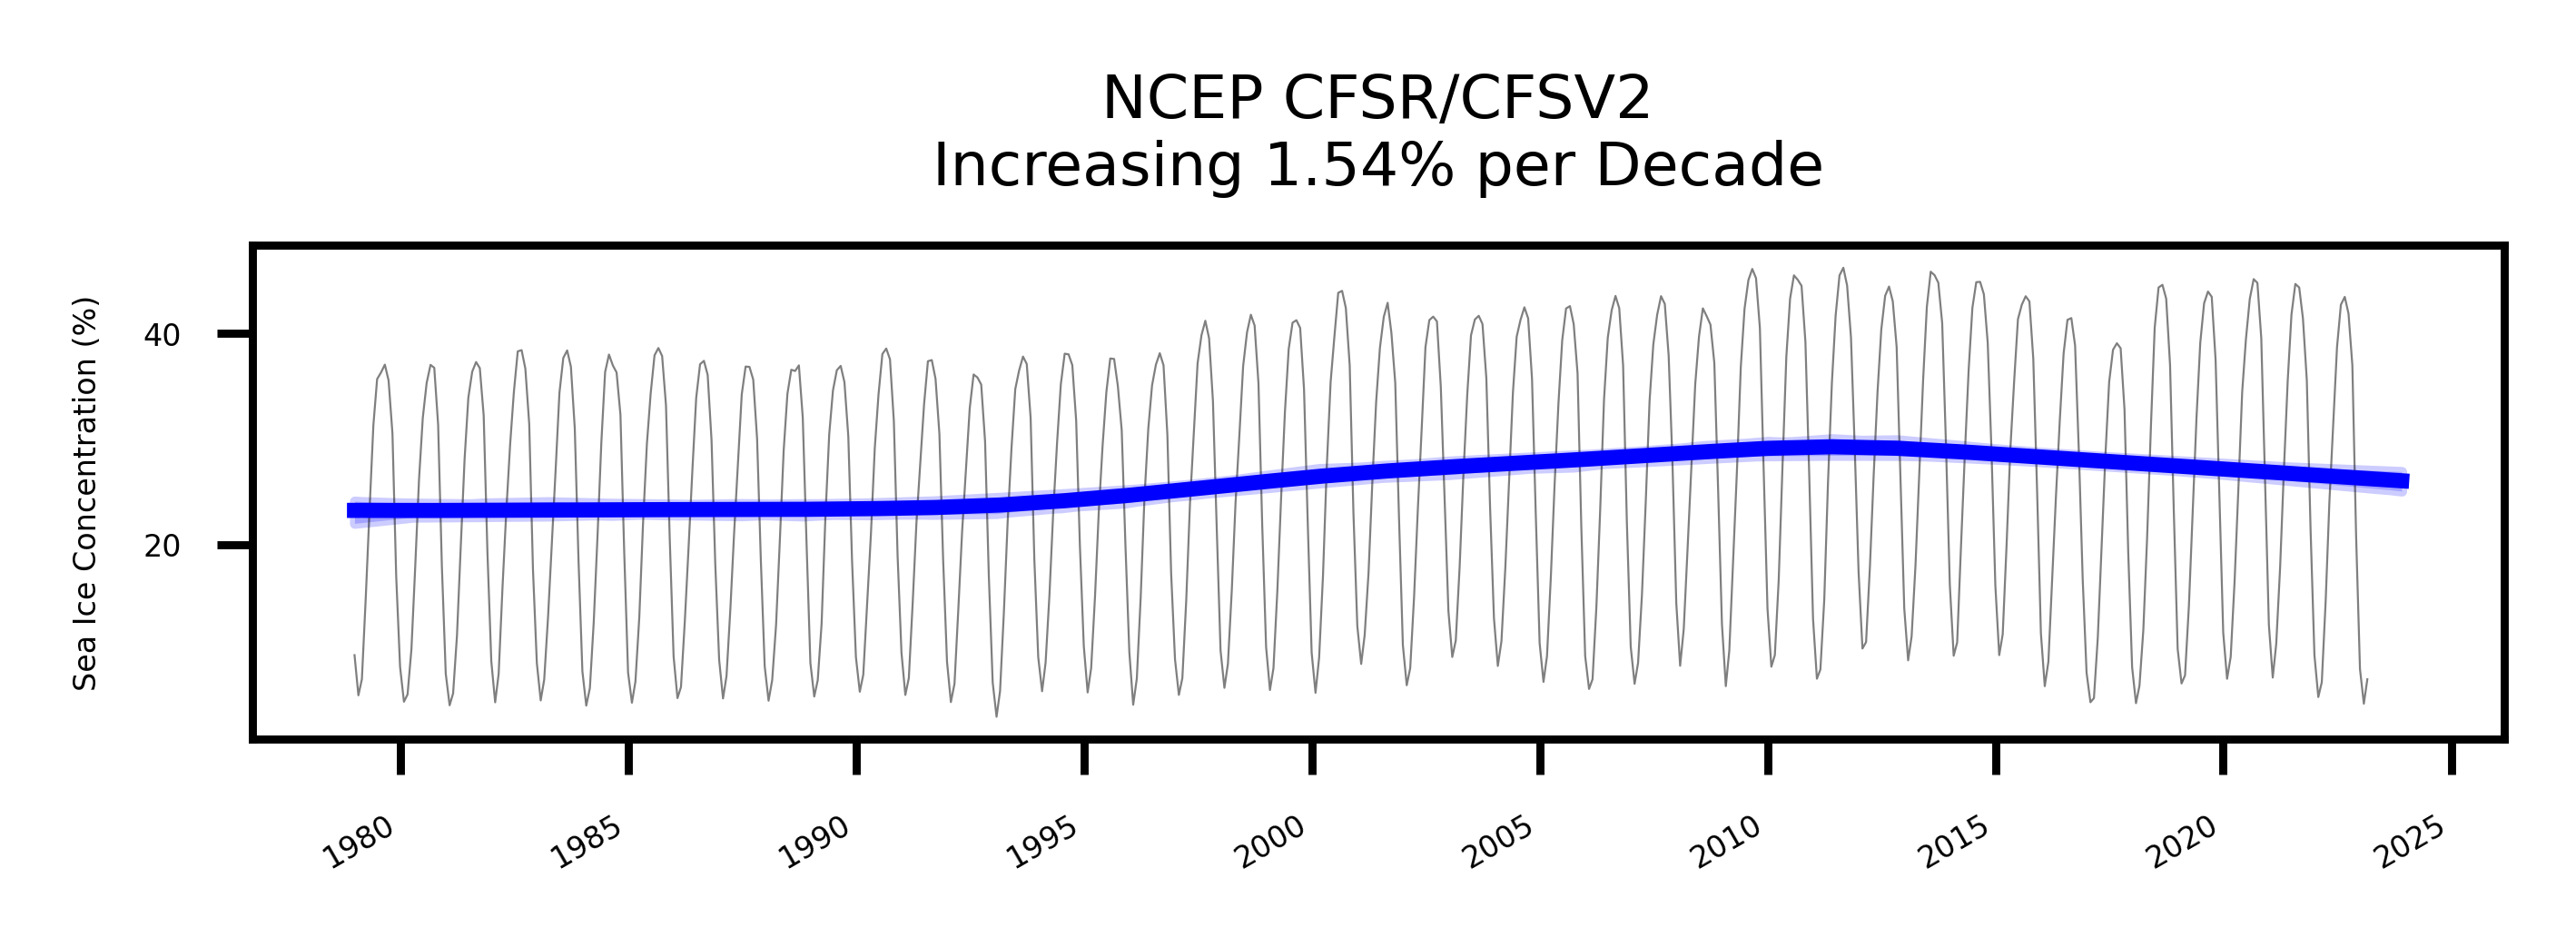

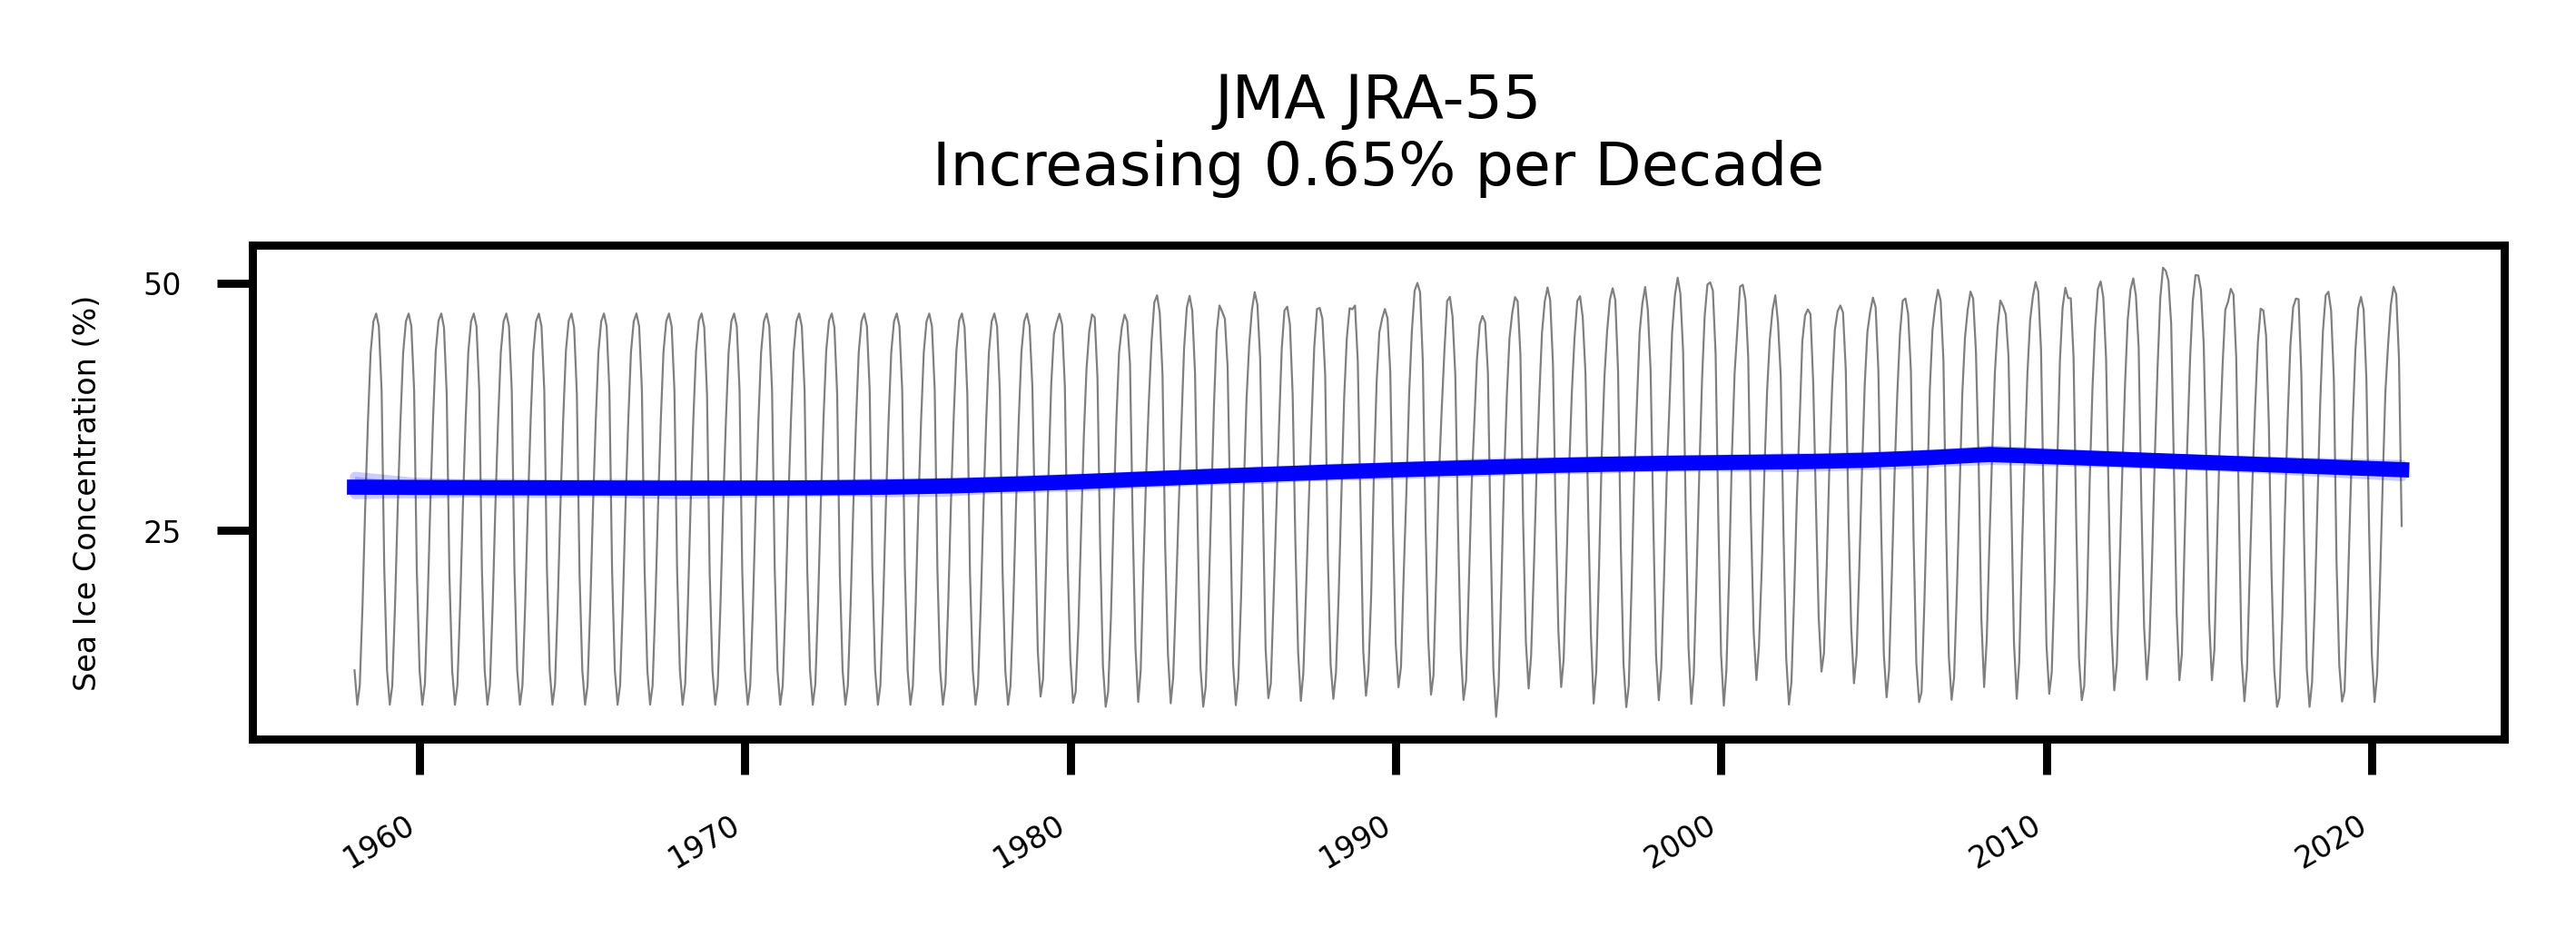

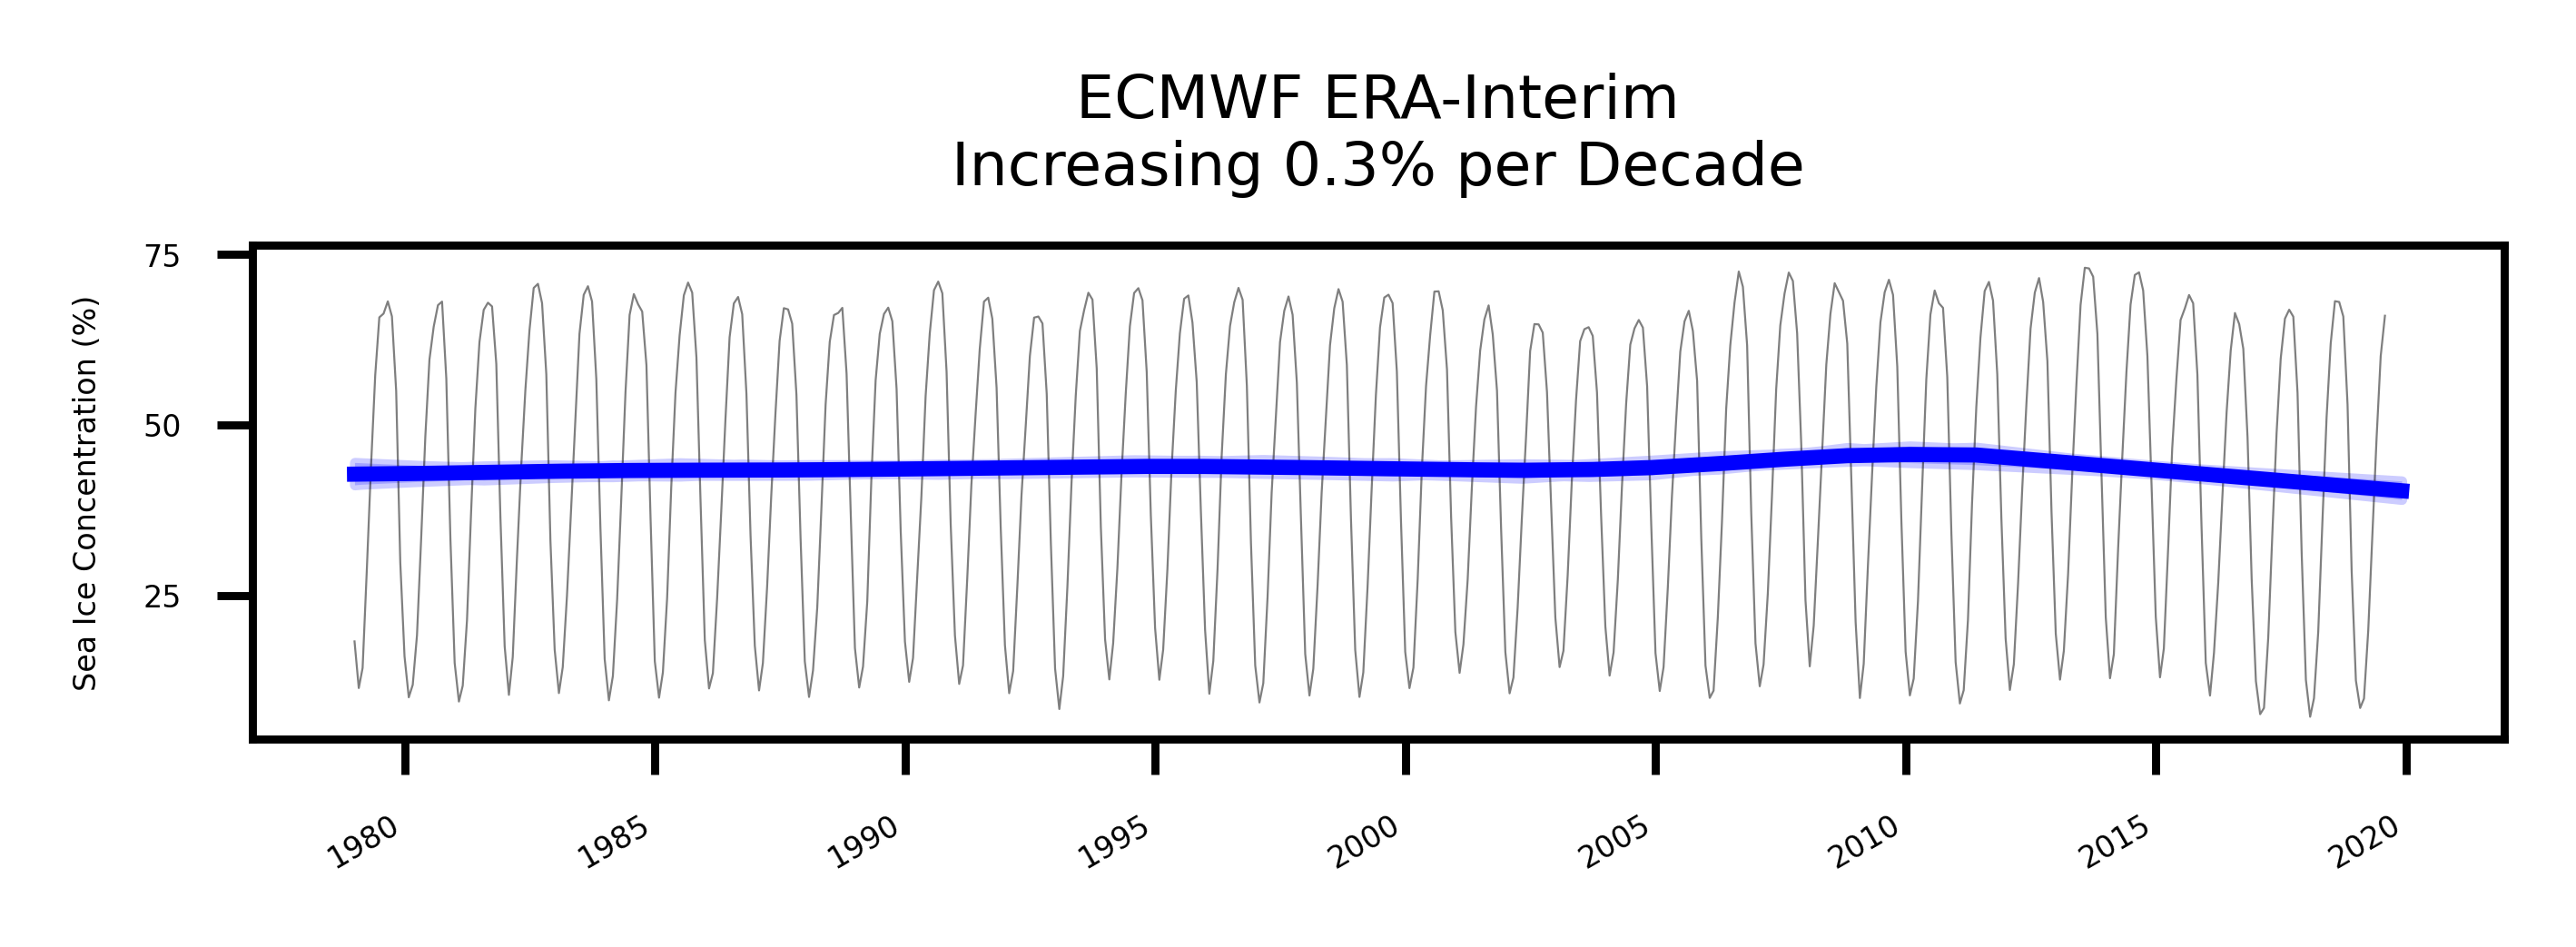

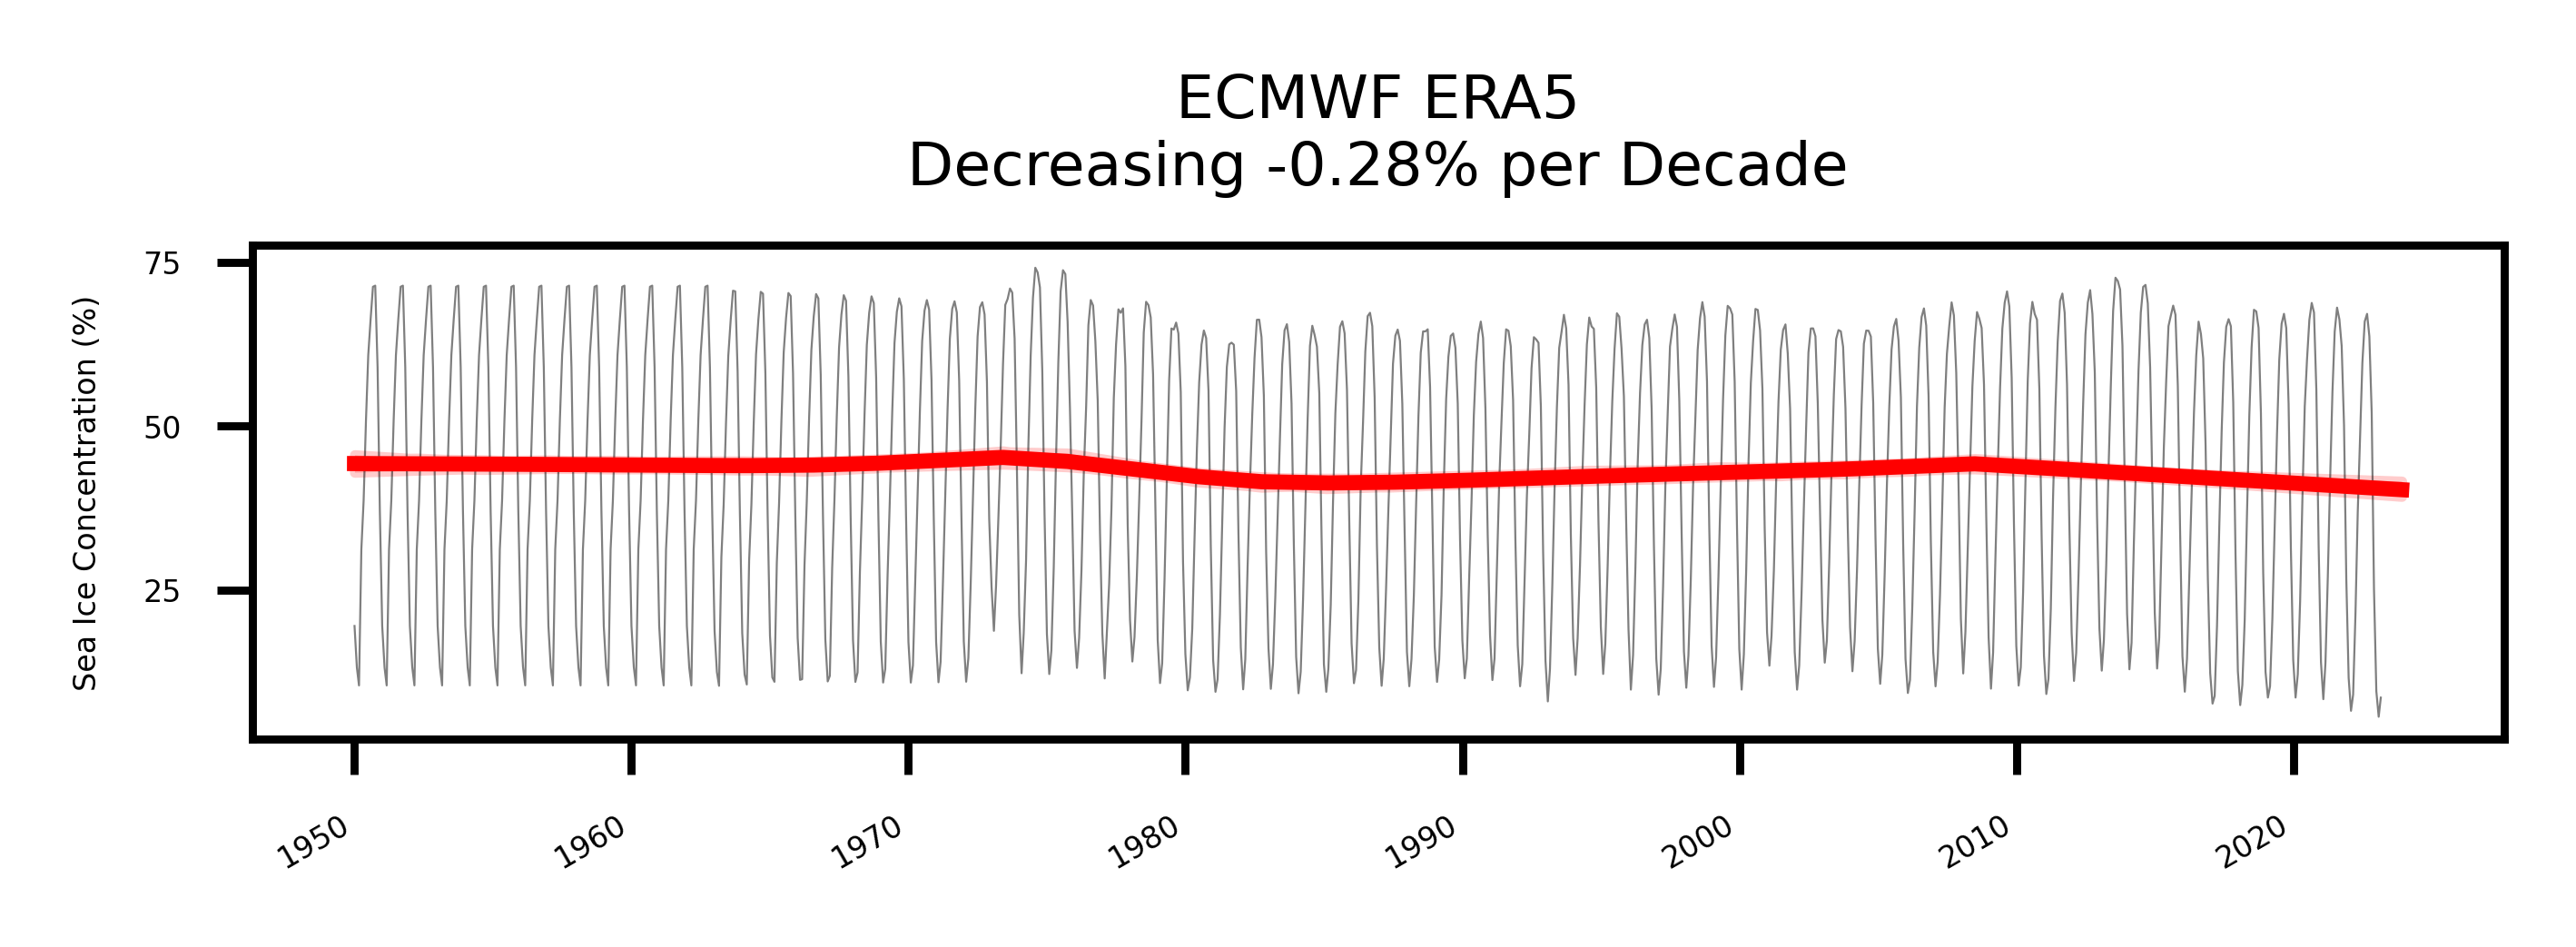

In [5]:
for name in list(urls.keys()):
    url = urls[name]
    df = read_data(url)
    model, forecast = fit_model(df)
    result = mk.original_test(forecast['trend'], alpha=0.05)
    trend = result.trend.title()
    slope = result.slope
    fig = plt.figure(figsize=(4, 1.0), constrained_layout=False, dpi=800)
    ax1 = fig.add_subplot()
    df['y'].plot(linewidth=0.2, ax=ax1, color='black', alpha=0.5)
    colors = {'Decreasing': 'red', 'Increasing': 'blue', 'No Trend': 'gray'}
    color = colors[trend]
    forecast['trend'].plot(ax=ax1, color=color)
    ax1.set_title(name + '\n' + trend + " " + str(round(slope * 12 * 10,2)) + "% per Decade", fontsize=6)
    ax1.fill_between(forecast.index, forecast['trend_lower'], forecast['trend_upper'],
            color=color, alpha=0.2)
    plt.xlabel('')
    plt.ylabel('Sea Ice Concentration (%)', fontsize=3)
    plt.yticks(fontsize=3)
    plt.xticks(fontsize=3)
    plt.show();

# Arctic Sea Ice Concentration

## Data Sources

These URLs are generated from [here](https://climatereanalyzer.org/reanalysis/monthly_tseries/). They include every available reanalysis of Arctic sea ice concentration.

In [6]:
urls = OrderedDict(
    {
        'NOAA OISST V2.1':'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/oisst2.1/oisst2.1_arctic_seaice_surface_0_0_table.csv',
        'NCEP/NCAR Reanalysis V1': 'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/ncep1/ncep1_arctic_seaice_surface_0_0_table.csv',
        'NCEP CFSR/CFSV2': 'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/cfsr/cfsr_arctic_seaice_surface_0_0_table.csv',
        'JMA JRA-55': 'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/jra55/jra55_arctic_seaice_surface_0_0_table.csv',
        'ECMWF ERA-Interim': 'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/erai/erai_arctic_seaice_surface_0_0_table.csv',
        'ECMWF ERA5': 'https://climatereanalyzer.org/reanalysis/monthly_tseries/output/era5-0p5deg/era5-0p5deg_arctic_seaice_surface_0_0_table.csv'
    }
)

## Time Series Trend Analysis

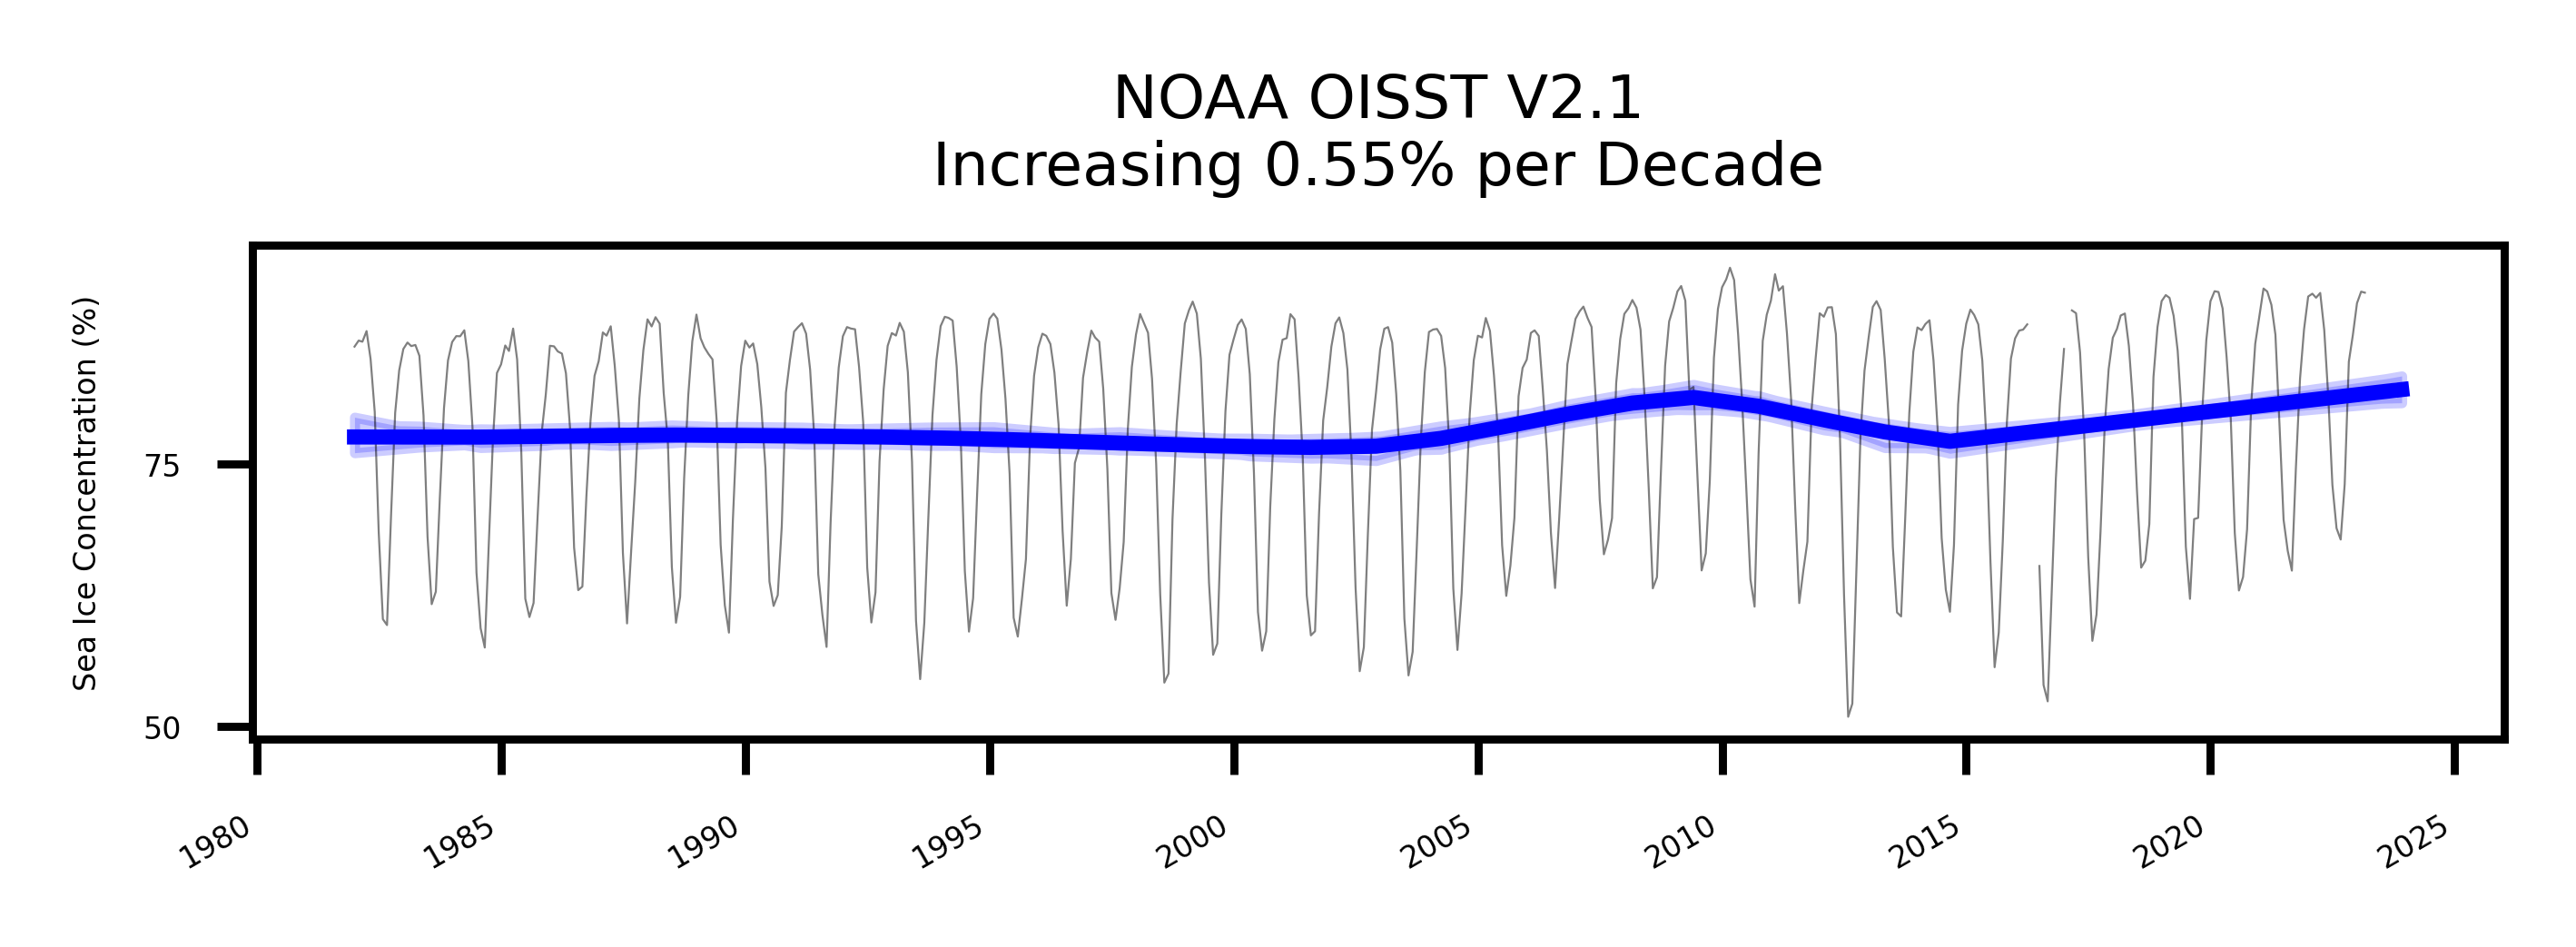

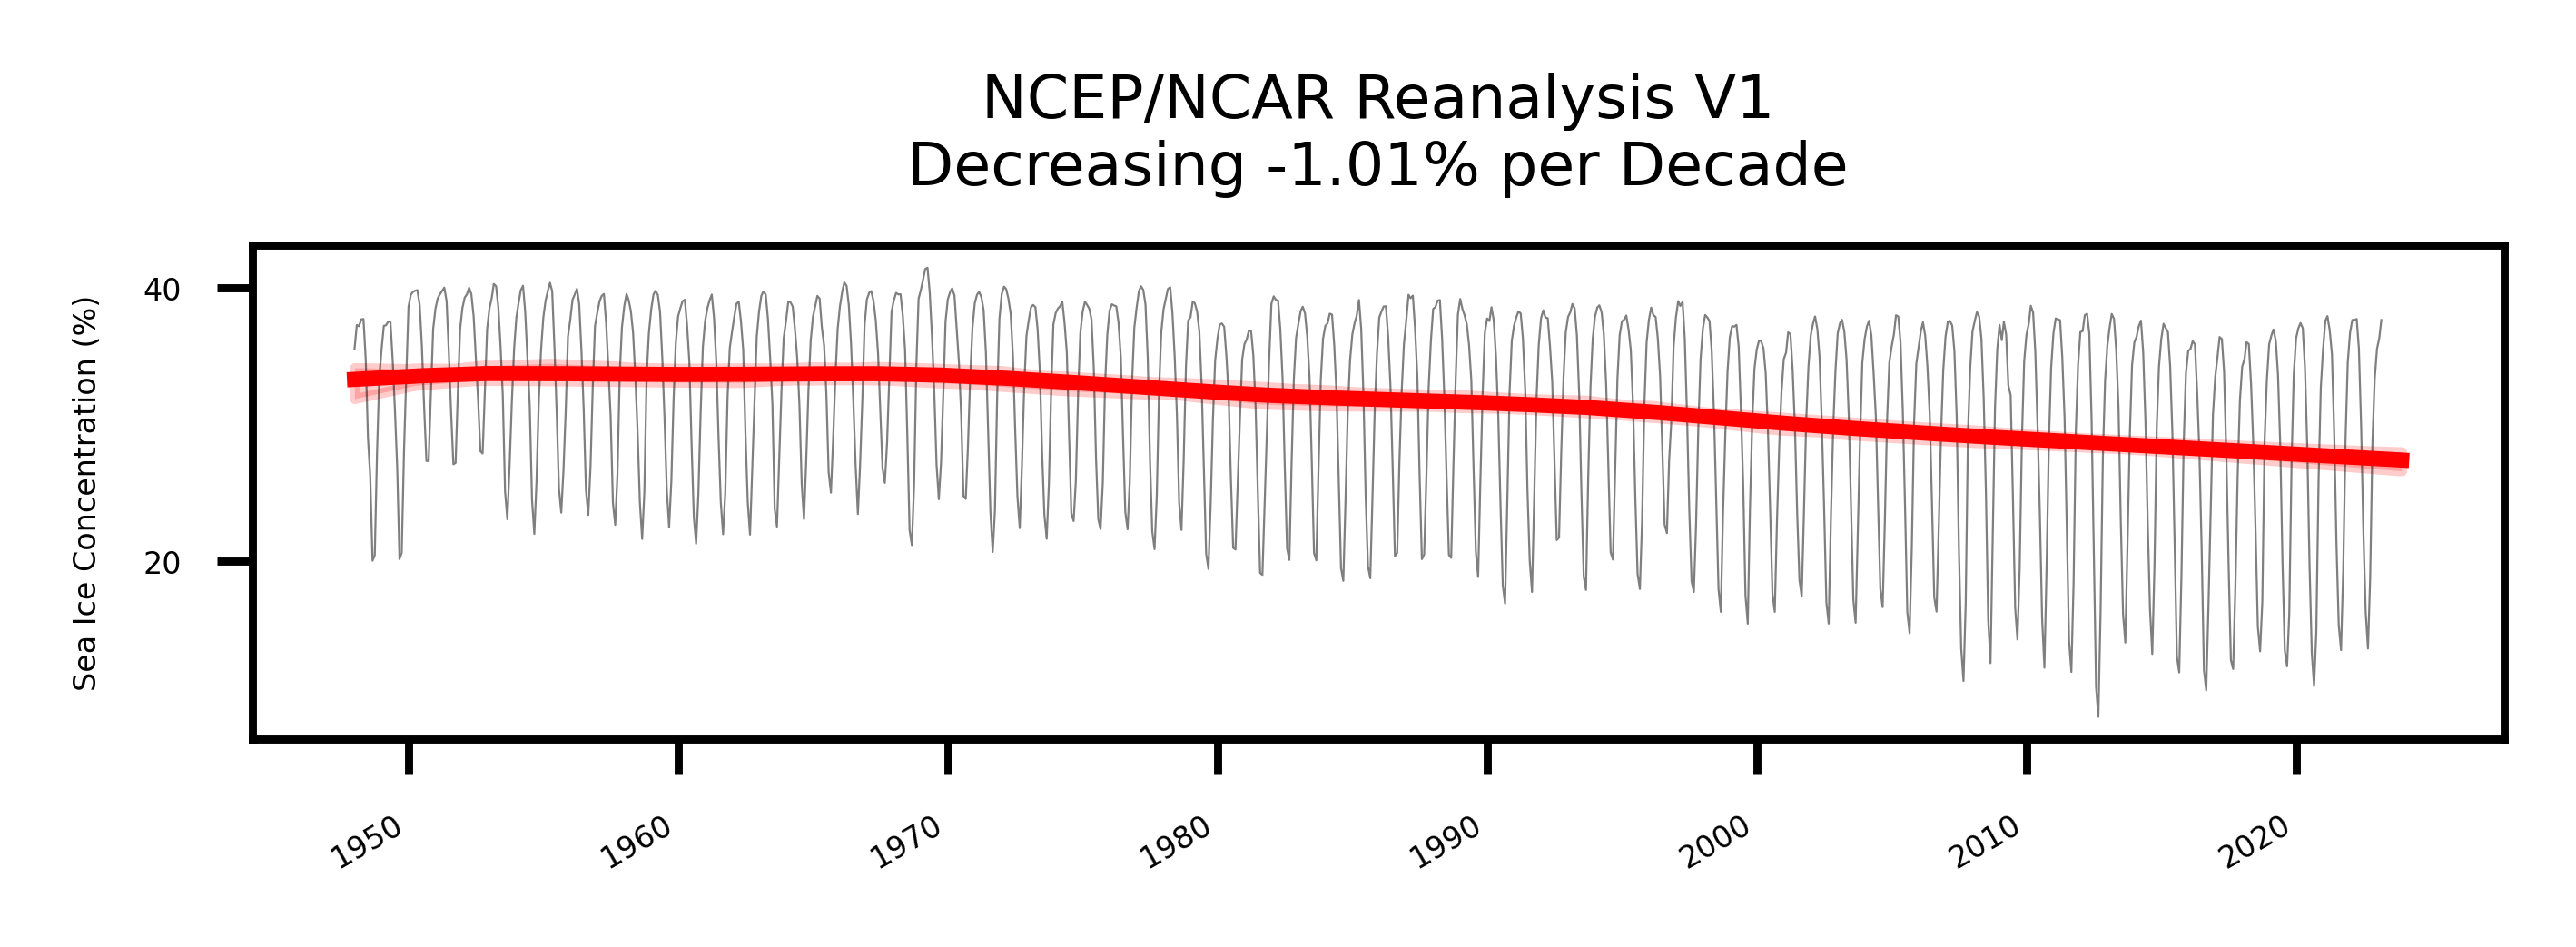

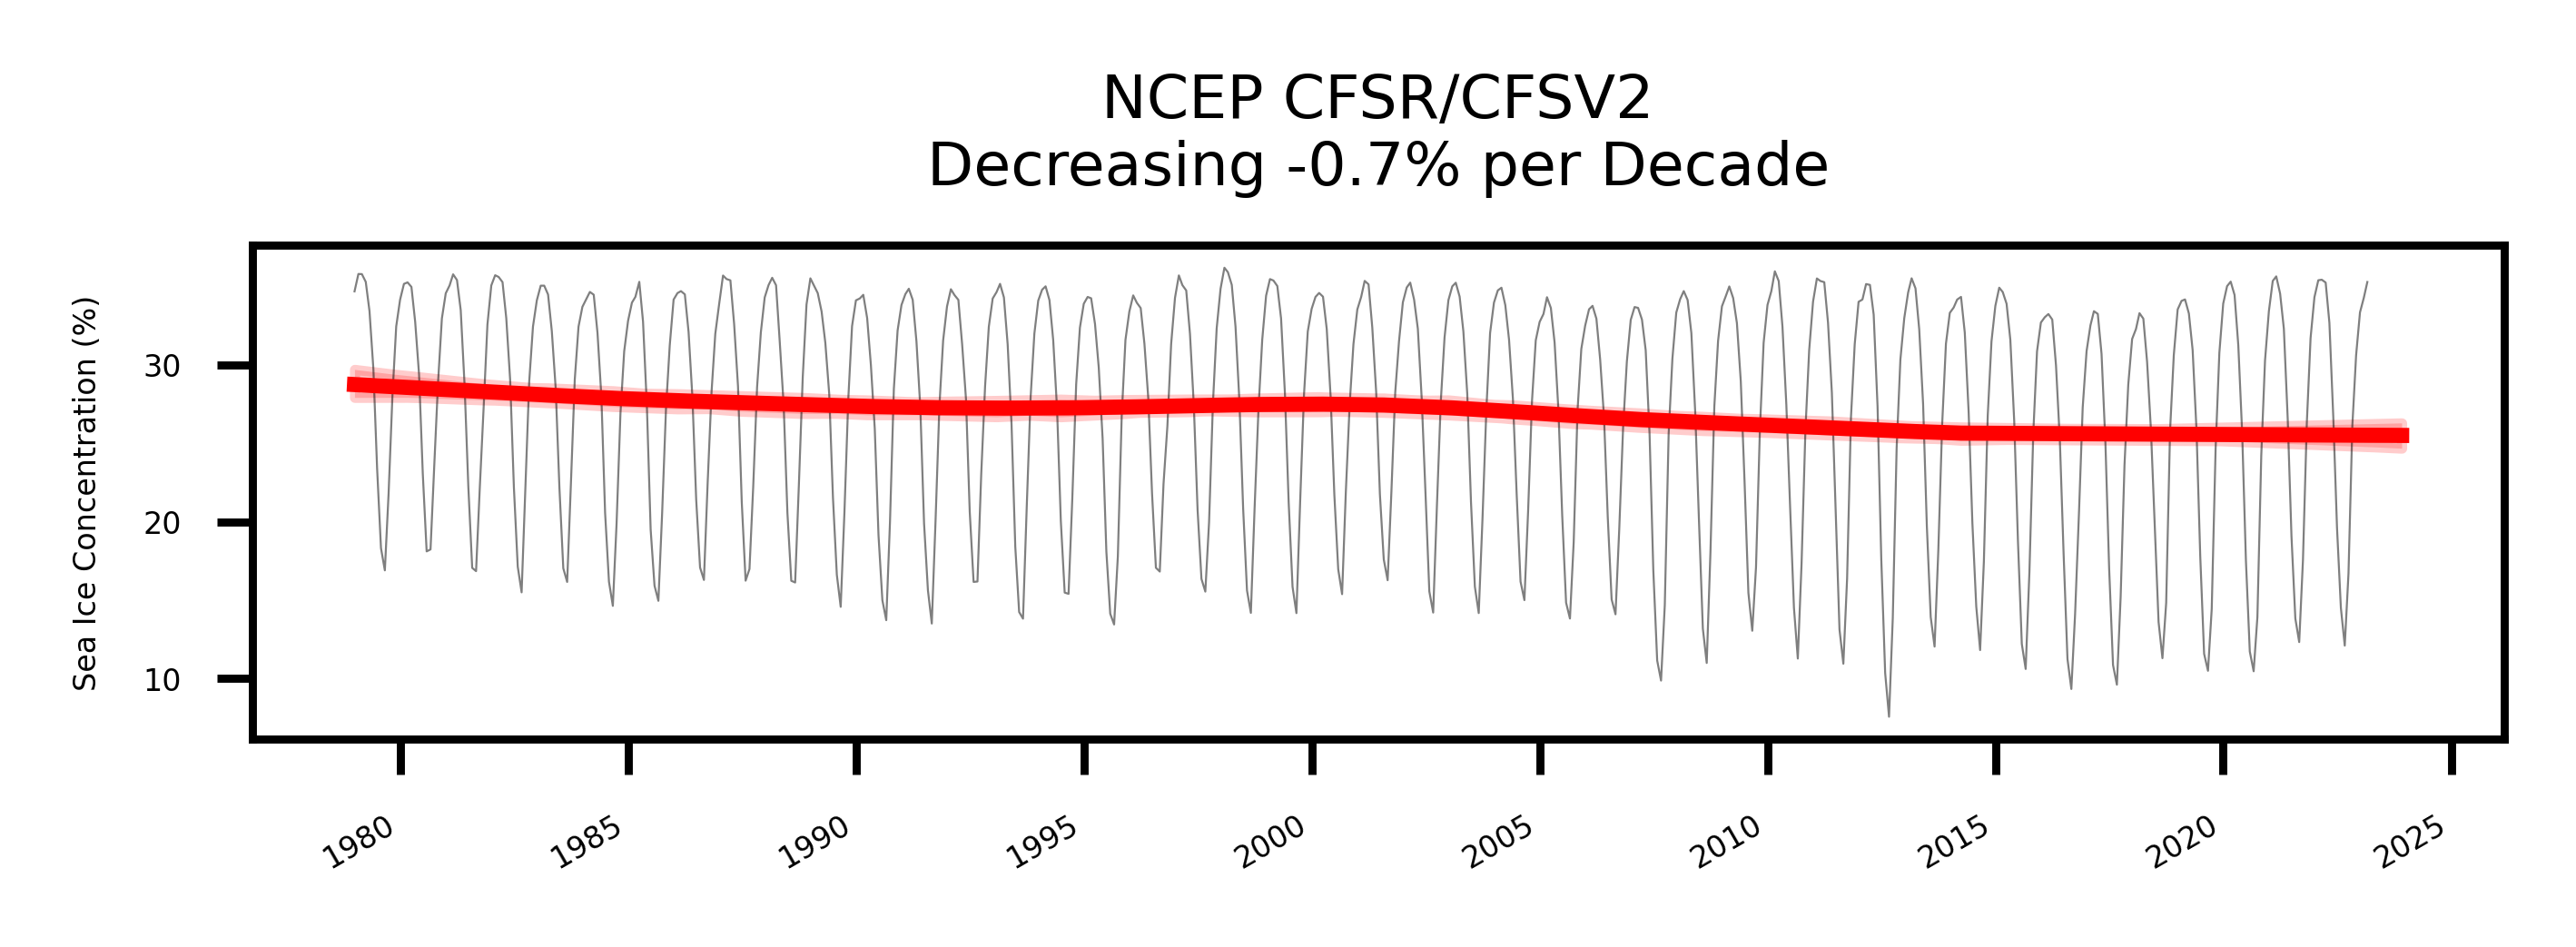

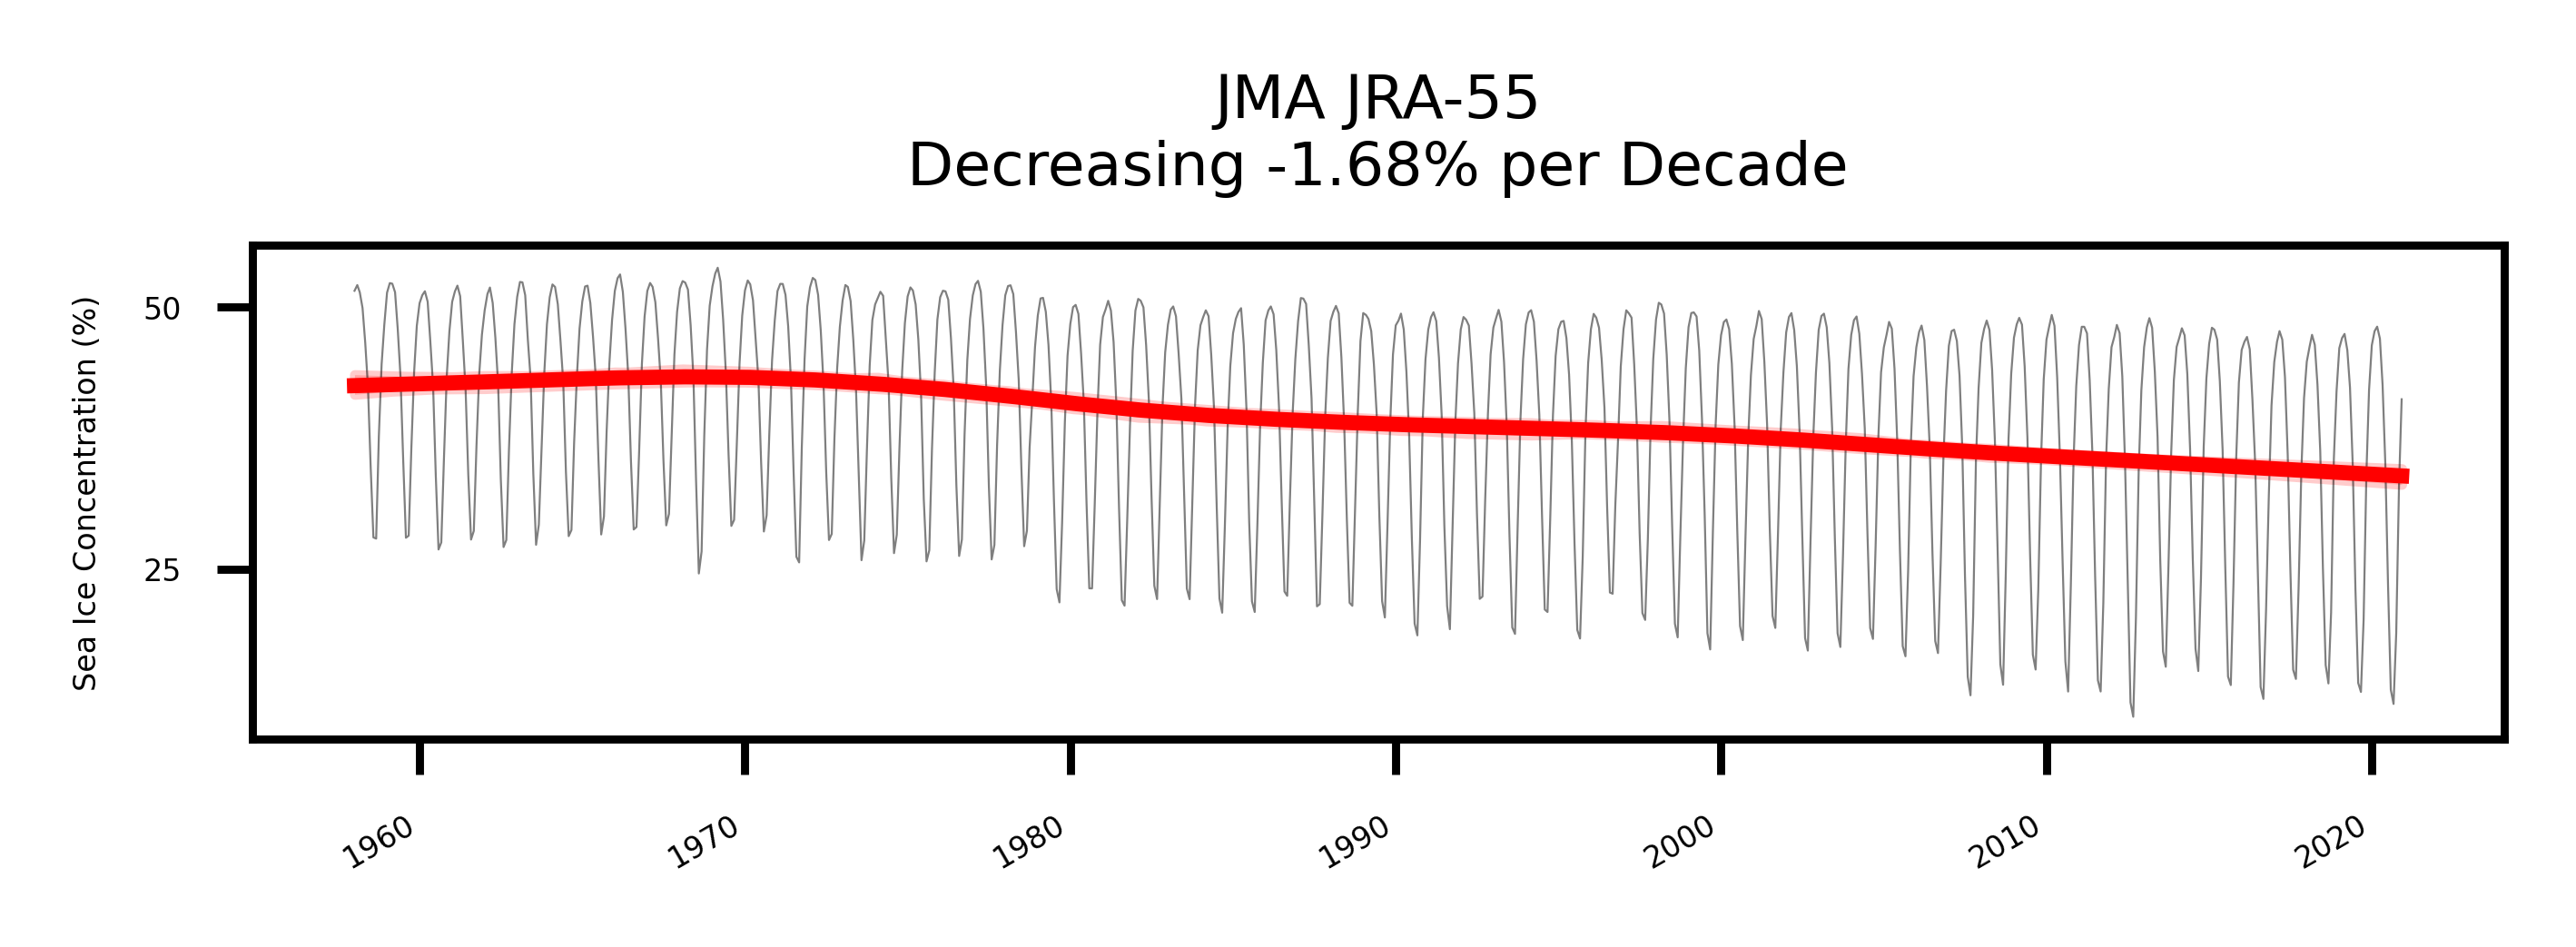

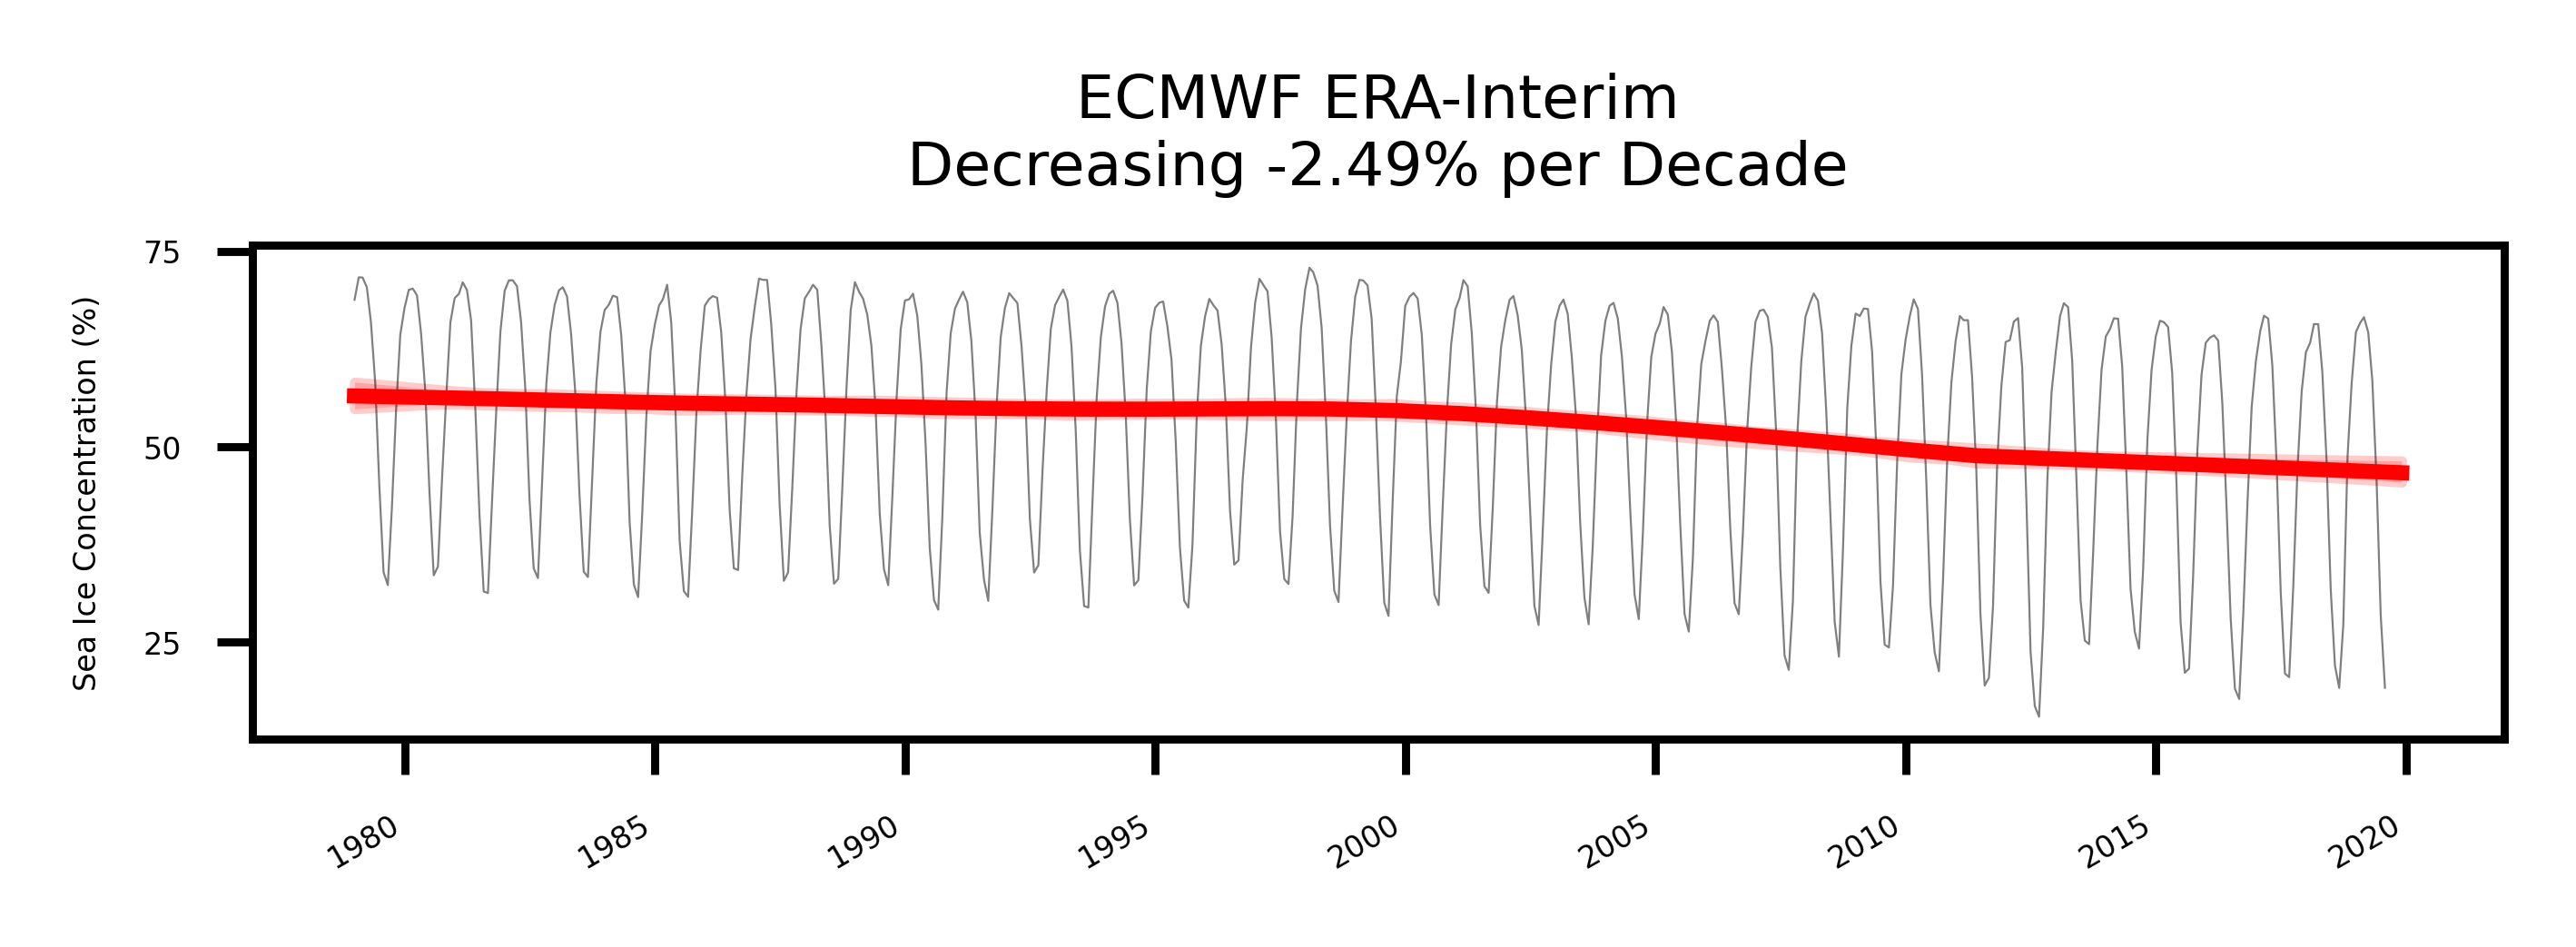

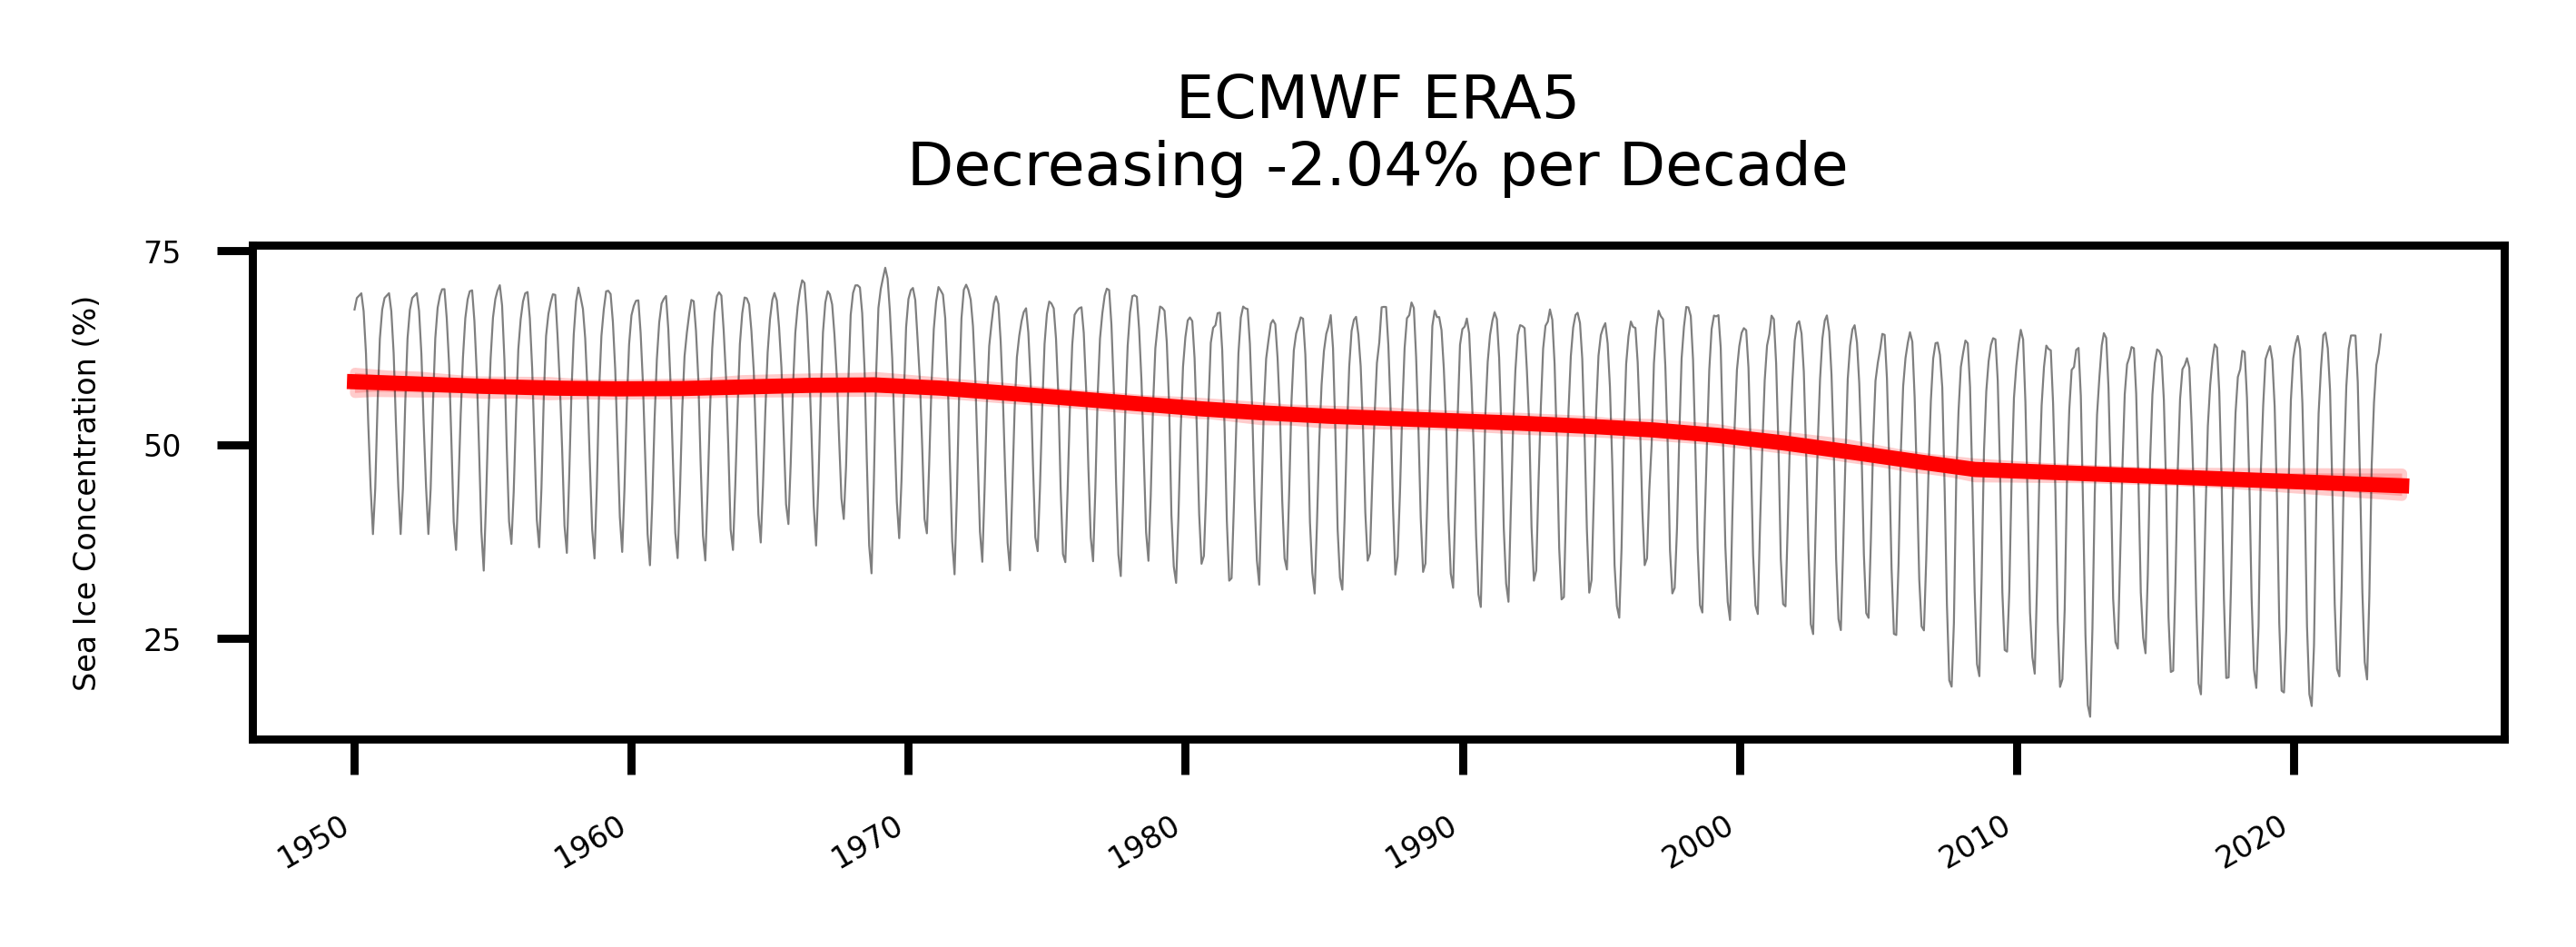

In [7]:
for name in list(urls.keys()):
    url = urls[name]
    df = read_data(url)
    model, forecast = fit_model(df)
    result = mk.original_test(forecast['trend'], alpha=0.05)
    trend = result.trend.title()
    slope = result.slope
    fig = plt.figure(figsize=(4, 1.0), constrained_layout=False, dpi=800)
    ax1 = fig.add_subplot()
    df['y'].plot(linewidth=0.2, ax=ax1, color='black', alpha=0.5)
    colors = {'Decreasing': 'red', 'Increasing': 'blue', 'No Trend': 'gray'}
    color = colors[trend]
    forecast['trend'].plot(ax=ax1, color=color)
    ax1.set_title(name + '\n' + trend + " " + str(round(slope * 12 * 10,2)) + "% per Decade", fontsize=6)
    ax1.fill_between(forecast.index, forecast['trend_lower'], forecast['trend_upper'],
            color=color, alpha=0.2)
    plt.xlabel('')
    plt.ylabel('Sea Ice Concentration (%)', fontsize=3)
    plt.yticks(fontsize=3)
    plt.xticks(fontsize=3)
    plt.show();